In [1]:
#필요한 패키지 임포트

import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [4]:
# 데이터 불러오기
df = pd.read_csv('superstore.csv')

# 데이터 샘플 확인
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
# date 컬럼 날짜 형식 변환
df['Date2']=pd.to_datetime(df['Order Date'], infer_datetime_format=True)

# 날짜 오름차순 정렬
df = df.sort_values(by='Date2')
# 연도 컬럼 생성
df['Year'] = df['Date2'].dt.year

# 선그래프용 데이터셋 생성
# 2018년 데이터만 필터링
df_line=df[df.Year == 2018]

# 2018년 일별 매출액 가공
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()

df_line.head()

c:\Users\Sontaesan\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Sontaesan\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Sontaesan\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Sontaesan\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide 

,Date2,Sales
0,2018-01-01,1481.828
1,2018-01-04,5972.988
2,2018-01-05,4108.370
3,2018-01-06,586.042
4,2018-01-07,639.830


선그래프 시각화에 앞서 일자별 매출액 데이터를 가공해 준다. 우선 기존 Order Date 칼럼을 날짜 형식으로 변환하고 연도 구분 컬럼을 생성해 준다.
그리고 2018년도의 일별 매출액 추이를 확인하기 위해 2018년도 데이터만 필터링한다.
마지막으로 groupby() 함수를 사용하여 일별 매출액을 가공해 준다.
출력된 데이터셋에서 일자별로 매출액 합계가 집계된 것을 확인할 수 있다.

<AxesSubplot:xlabel='Date2'>

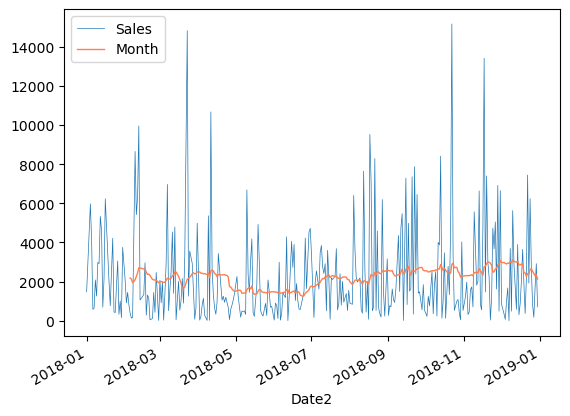

In [7]:
# 30일 이동평균 생성
df_line['Month'] = df_line['Sales'].rolling(window=30).mean()

# 선그래프 시각화
ax = df_line.plot(x='Date2', y='Sales', linewidth = "0.5")
df_line.plot(x='Date2',y='Month', color='#FF7F50', linewidth = "1", ax=ax)

In [8]:
# 연도별 판매량 데이터 가공
df_bar_1 = df.groupby('Year')['Sales'].sum().reset_index()

df_bar_1.head()

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


막대 그래프 시각화를 위해 연도별 매출액 데이터를 가공한다. 
앞에서 만들었던 Year 컬럼으로 groupby()를 하여 연도별 매출액 합계를 만들었다.
2015년부터 2018년까지의 행이 생성된 것을 확인할 수 있다. 